In [14]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

In [2]:
T = 20
t_eval = np.linspace(0, T, 500)
t_span = (0, T)

gamma0 = 0.05
rho_c = 0.2
A_max = 1.0
H_max = 1.0
lambda_W = 1.0
C_lambda_V = 5.0

In [3]:
def nutrient_concentration(t):
    return 0.8 + 0.2 * np.sin(0.5 * t)


def antibiotic_stress(t):
    return 0.5 + 0.5 * np.sin(2 * t)

In [4]:
def gamma_t(t):
    nutrient = nutrient_concentration(t)
    stress = antibiotic_stress(t)
    gamma = gamma0 * nutrient * (1 - 0.5 * stress)
    return max(gamma, 0.01) 

In [5]:
def system(t, y):
    W, V = y
    gamma = gamma_t(t)
    lambda_V = -t + C_lambda_V

    if lambda_V * gamma != 0:
        A = np.clip(lambda_W / (lambda_V * gamma), 0, A_max)
        H = np.clip(-lambda_W / (lambda_V * gamma), 0, H_max)
    else:
        A, H = 0.0, 0.0

    dW_dt = A - H
    dV_dt = gamma * A * H
    return [dW_dt, dV_dt]

In [6]:
sol = solve_ivp(system, t_span, [0.5, 1.0], t_eval=t_eval)
W, V = sol.y
density = W / V
volume = V

In [7]:
gamma_vals = []
A_vals = []
H_vals = []
growth_rate = []
J_vals = []
nutrient_vals = []
stress_vals = []

for i, t in enumerate(t_eval):
    gamma = gamma_t(t)
    lambda_V = -t + C_lambda_V
    nutrient_vals.append(nutrient_concentration(t))
    stress_vals.append(antibiotic_stress(t))
    gamma_vals.append(gamma)

    if lambda_V * gamma != 0:
        A = np.clip(lambda_W / (lambda_V * gamma), 0, A_max)
        H = np.clip(-lambda_W / (lambda_V * gamma), 0, H_max)
    else:
        A, H = 0.0, 0.0
    A_vals.append(A)
    H_vals.append(H)
    growth_rate.append(gamma * A * H)
    J_vals.append(volume[i])

In [9]:
np.random.seed(42)
noise_level = 0.05

A_vals_noisy = np.array(A_vals) + np.random.normal(0, noise_level, len(A_vals))
H_vals_noisy = np.array(H_vals) + np.random.normal(0, noise_level, len(H_vals))
growth_rate_noisy = np.array(growth_rate) + \
    np.random.normal(0, noise_level, len(growth_rate))
volume_noisy = np.array(volume) + np.random.normal(0, noise_level, len(volume))
density_noisy = np.array(density) + np.random.normal(0,
                                                     noise_level, len(density))
J_vals_noisy = np.array(J_vals) + np.random.normal(0, noise_level, len(J_vals))

In [12]:
df = pd.DataFrame({
    'Time': t_eval,
    'A': A_vals_noisy,
    'H': H_vals_noisy,
    'GrowthRate': growth_rate_noisy,
    'Volume': volume_noisy,
    'Density': density_noisy,
    'Objective': J_vals_noisy,
    'Nutrient': nutrient_vals,
    'Stress': stress_vals
})

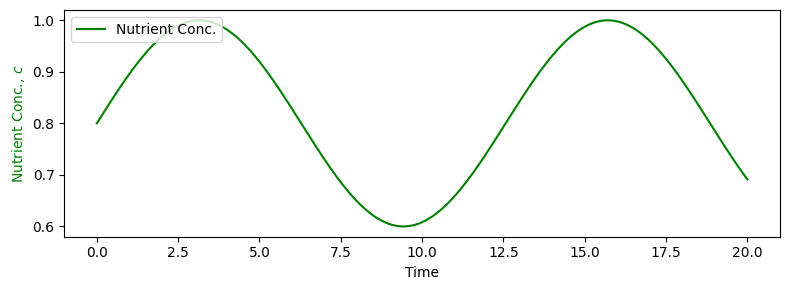

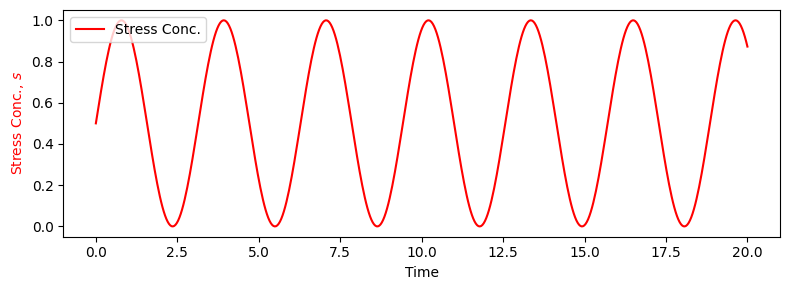

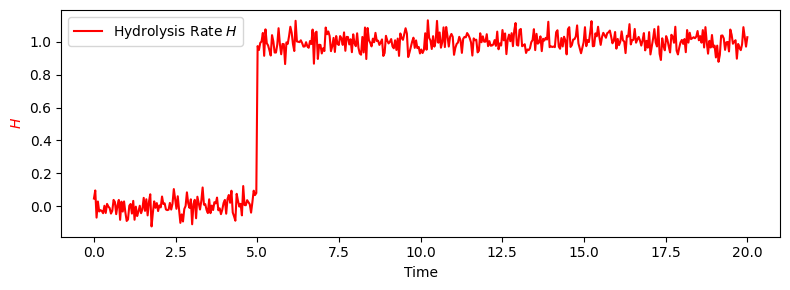

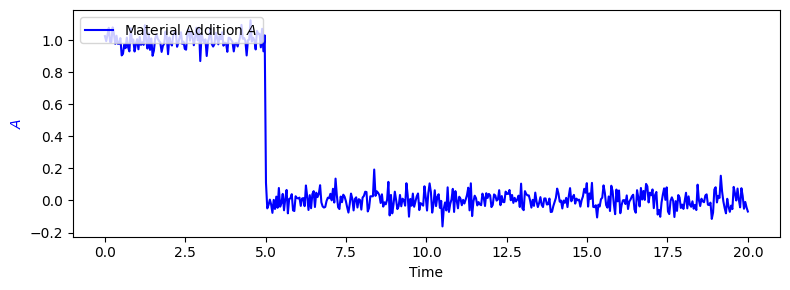

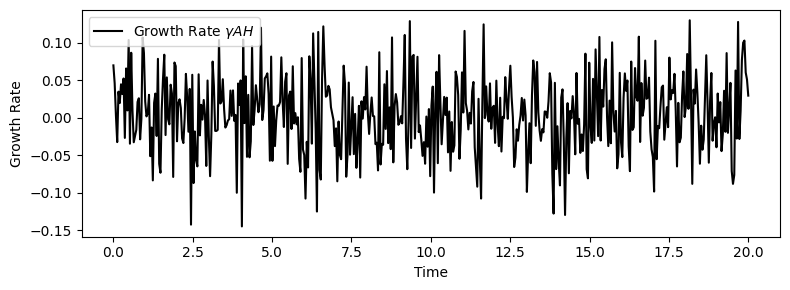

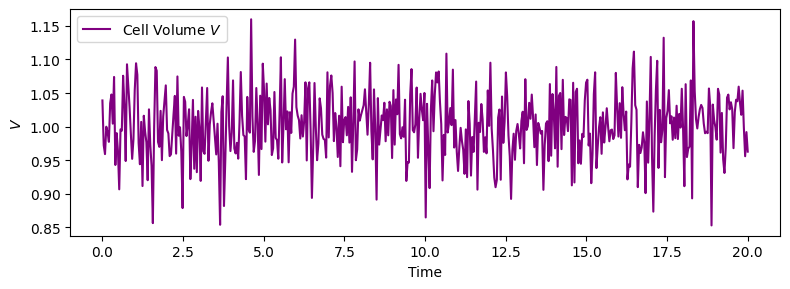

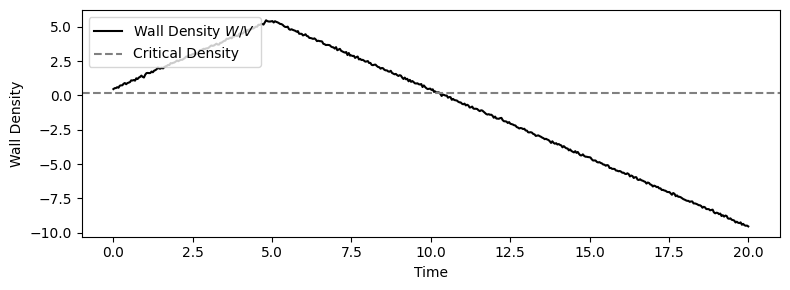

In [21]:
t = df['Time']
A = df['A']
H = df['H']
gamma = df['GrowthRate']
V = df['Volume']
W_over_V = df['Density']
nutrient = df['Nutrient']
stress = df['Stress']

plt.figure(figsize=(8, 3))
plt.plot(t, nutrient, color='green', label='Nutrient Conc.')
plt.ylabel('Nutrient Conc., $c$', color='green')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(t, stress, color='red', label='Stress Conc.')
plt.ylabel('Stress Conc., $s$', color='red')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(t, H, color='red', label='Hydrolysis Rate $H$')
plt.ylabel('$H$', color='red')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(t, A, color='blue', label='Material Addition $A$')
plt.ylabel('$A$', color='blue')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(t, gamma, color='black', label='Growth Rate $\gamma A H$')
plt.ylabel('Growth Rate')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(t, V, color='purple', label='Cell Volume $V$')
plt.ylabel('$V$')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(t, W_over_V, color='black', label='Wall Density $W/V$')
plt.axhline(y=rho_c, color='gray', linestyle='--', label='Critical Density')
plt.ylabel('Wall Density')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()